In [31]:
from matplotlib import pyplot as plt
from pathlib import Path
import pickle
import os
from test4 import model
import sort_of_clevr2
home = str(Path.home())


In [32]:
##load data
train_size = 9800
val_size = 200
image_size = 75
size = 5
cloest = 3
mode = 'val'
# mode = 'train'
DATA_PATH = home + '/data/sortofclevr2/' + '_'.join(map(str,[train_size,val_size, image_size, size, cloest]))
FILE = 'sort-of-clevr2-{}.pickle'.format(mode)
with open(os.path.join(DATA_PATH, FILE), 'rb') as f:
    data = pickle.load(f)

In [50]:
# model_type = 'test5'
# MODEL_PATH = os.path.join(home, 'codes', 'rn', model_type, model_name)


load_code = '181018182500rn_sortofclevr2_500_64_0.0001_2_inp_3_9800_200_75_5_3_cv_24_3_2_4_True_te_8_128_1_hp_128_4_gt_1000_4_fp_256_2_0.2_3_test4'
load_name = 'conv.pt'
print( load_code.split('_'))
print(len(['181018182500rn', 'sortofclevr2', '500', '64', '0.0001', '2', 'inp', '3', '9800', '200', '75', '5', '3', 'cv', '24', '3', '2', '4', 'True', 'te', '8', '128', '1', 'hp', '128', '4', 'gt', '1000', '4', 'fp', '256', '2', '0.2', '3', 'test4']))

name, dataset, epochs, batch_size, lr, device, \
_, channel_size, a,b,c, train_size, test_size, image_size, size, closest,\
_, cv_filter, cv_kernel, cv_stride, cv_layer, cv_layernorm,\
_, te_embedding, te_hidden, te_layer,\
_, gt_hidden, gt_layer,\
_, fp_hidden, fp_dropout, fp_dropout_rate, fp_layer,\
model_type = load_code.split('_')
print(te_layer)

channel_size, train_size, test_size, image_size, size, closest, cv_filter, cv_kernel, cv_stride, cv_layer, te_embedding, te_hidden, te_layer,  gt_hidden, gt_layer, fp_hidden, fp_layer = \
map(int, [channel_size, train_size, test_size, image_size, size, closest, cv_filter, cv_kernel, cv_stride, cv_layer, te_embedding, te_hidden, te_layer,  gt_hidden, gt_layer, fp_hidden, fp_layer])
cv_layout = [(cv_filter, cv_kernel, cv_stride) for i in range(cv_layer)]
gt_layout = [gt_hidden for i in range(gt_layer)]
gt_layout.insert(0, (cv_filter + 2) * 2 + te_embedding * 2)
fp_layout = [gt_hidden] + [fp_hidden for i in range(fp_layer - 1)] + [sort_of_clevr2.a_size]

conv = model.Conv(input_h, input_w, cv_layout, channel_size, cv_layernorm).to(device)
g_theta = model.MLP(gt_layout).to(device)
f_phi = model.MLP(fp_layout).to(device)
text_encoder = model.Text_embedding(train_loader.dataset.c_size, train_loader.dataset.q_size, te_embedding).to(device)
# model_name = 'text_encoder.pt'
# model_name = 'g_theta.pt'
# model_name = 'f_phi.pt'

LOAD_PATH = os.path.join(home, 'experiment', 'rn', load_code, load_name)
LOAD_PATH

['181018182500rn', 'sortofclevr2', '500', '64', '0.0001', '2', 'inp', '3', '9800', '200', '75', '5', '3', 'cv', '24', '3', '2', '4', 'True', 'te', '8', '128', '1', 'hp', '128', '4', 'gt', '1000', '4', 'fp', '256', '2', '0.2', '3', 'test4']
35
4


ValueError: invalid literal for int() with base 10: 'cv'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


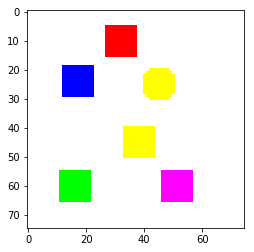

In [21]:
data_num = 0
image, nrel, rel = data[data_num]
image
plt.imshow(image)